# Anatomy of an Economic Recession;Trends & Indicators - Yield curve Analysis

In [1]:
import numpy as np 
import pandas as pd 

from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

import warnings
warnings.simplefilter(action='ignore')
from sklearn import tree
from sklearn import metrics, svm
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error
from sklearn import tree
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

## Actual Dataset being Imported

In [2]:
# Read CSV data file into DataFrame
df = pd.read_csv("C:/Users/shubh/OneDrive/Desktop/Semester_2_SSubject/Machine_Learning/Data_Science_Project/Yield/Data Yield Curve.csv")

# preview data
df.head()

,Date,1 yr,30YR,SPREAD,SP500,GOLD,OIL,CHHUSD,JPYUSD,UNEMP IDX
0,01-03-1977,5.50,7.80,2.30,0.0,148.34,0.0,2.55,280.23,7.4
1,01-04-1977,5.44,7.73,2.29,0.0,149.18,0.0,2.53,275.21,7.2
2,01-05-1977,5.84,7.80,1.95,0.0,146.54,0.0,2.52,277.43,7.0
3,01-06-1977,5.80,7.64,1.84,0.0,140.83,0.0,2.49,272.86,7.2
4,01-07-1977,5.94,7.64,1.71,0.0,143.40,0.0,2.41,264.86,6.9


## Cleaned Dataset

## Plotting 1yr - 30 yr bonds Yield

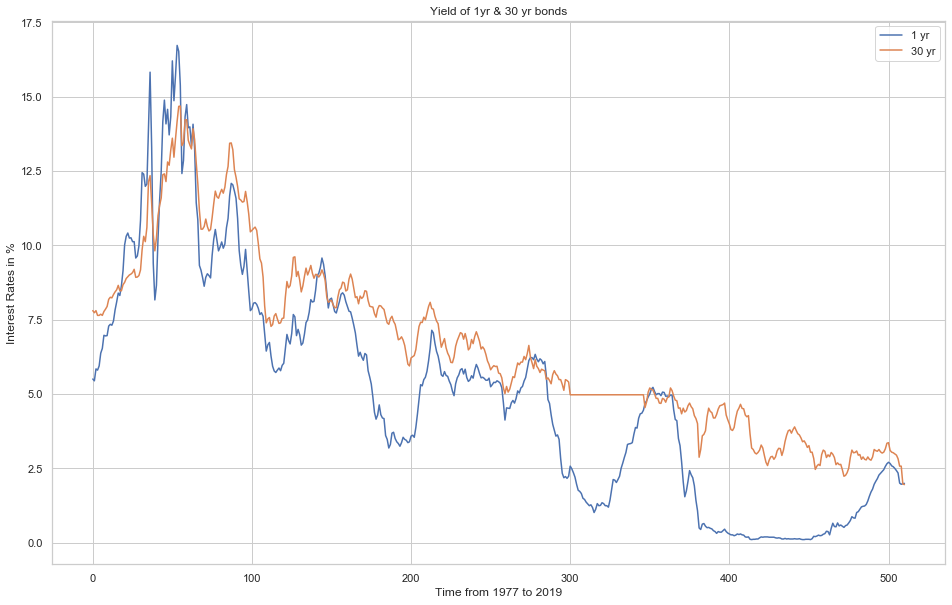

In [3]:
plt.subplots(figsize =(16, 10)) 
plt.plot(df['1 yr'], label = "1 yr")
plt.plot(df['30YR'], label = "30 yr")
plt.title('Yield of 1yr & 30 yr bonds')
plt.xlabel('Time from 1977 to 2019')
plt.ylabel('Interest Rates in %')
plt.legend()
plt.show()

## Plotting the Yield Spread 

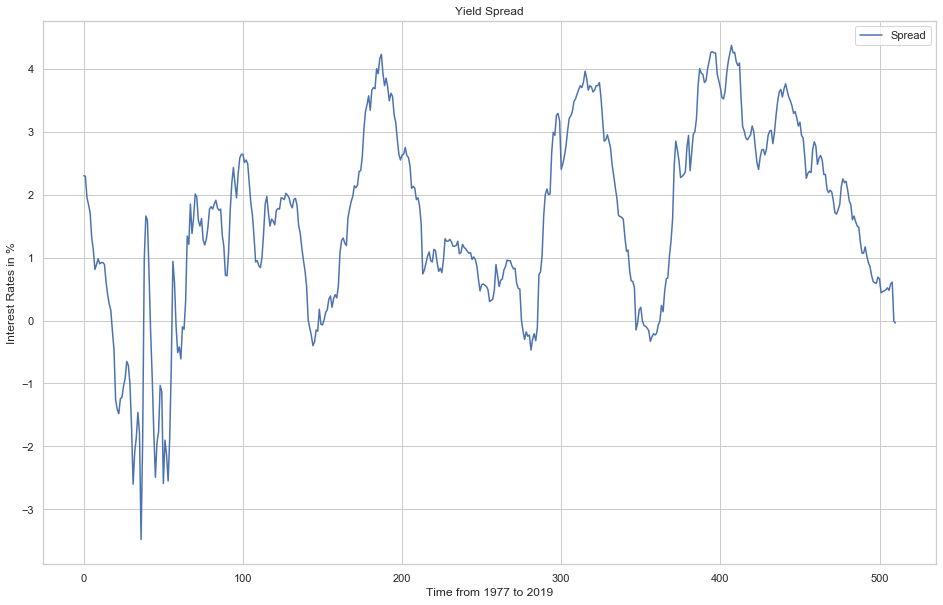

In [4]:
plt.subplots(figsize =(16, 10)) 
plt.plot(df['SPREAD'], label = "Spread")
plt.title('Yield Spread')
plt.xlabel('Time from 1977 to 2019')
plt.ylabel('Interest Rates in %')
plt.legend()
plt.show()

In [5]:
# Dropping Unnecessary columns
df = df.drop(['Date','1 yr','30YR'],axis=1)

## Dataset Details

In [6]:
df.shape

(511, 7)

In [7]:
# describe
df.describe()

,SPREAD,SP500,GOLD,OIL,CHHUSD,JPYUSD,UNEMP IDX
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,1.604070,883.385108,625.714462,34.827202,1.434090,139.297299,6.217808
std,1.478339,759.363409,427.939018,31.600265,0.413701,51.847708,1.626067
min,-3.480000,0.000000,140.830000,0.000000,0.780000,76.640000,3.500000
25%,0.645000,261.840000,341.425000,14.905000,1.085000,106.865000,5.000000
50%,1.650000,885.140000,400.130000,21.900000,1.390000,118.810000,5.900000
75%,2.710000,1326.525000,926.425000,55.650000,1.650000,147.395000,7.200000
max,4.370000,2945.830000,1780.650000,133.880000,2.800000,280.230000,10.800000


In [8]:
#checking for null in the dataset
df.isnull().sum()

SPREAD       0
SP500        0
GOLD         0
OIL          0
CHHUSD       0
JPYUSD       0
UNEMP IDX    0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SPREAD     511 non-null    float64
 1   SP500      511 non-null    float64
 2   GOLD       511 non-null    float64
 3   OIL        511 non-null    float64
 4   CHHUSD     511 non-null    float64
 5   JPYUSD     511 non-null    float64
 6   UNEMP IDX  511 non-null    float64
dtypes: float64(7)
memory usage: 28.1 KB


### Correlation HeatMap

In [10]:
Correlation_Map = df.corr()
Correlation_Map

,SPREAD,SP500,GOLD,OIL,CHHUSD,JPYUSD,UNEMP IDX
SPREAD,1.000000,0.237454,0.341636,0.443325,-0.345101,-0.428402,0.379335
SP500,0.237454,1.000000,0.667457,0.704835,-0.727102,-0.657091,-0.452368
GOLD,0.341636,0.667457,1.000000,0.791687,-0.708751,-0.476213,0.130465
OIL,0.443325,0.704835,0.791687,1.000000,-0.773251,-0.684743,-0.015022
CHHUSD,-0.345101,-0.727102,-0.708751,-0.773251,1.000000,0.866188,0.236702
JPYUSD,-0.428402,-0.657091,-0.476213,-0.684743,0.866188,1.000000,0.324157
UNEMP IDX,0.379335,-0.452368,0.130465,-0.015022,0.236702,0.324157,1.000000


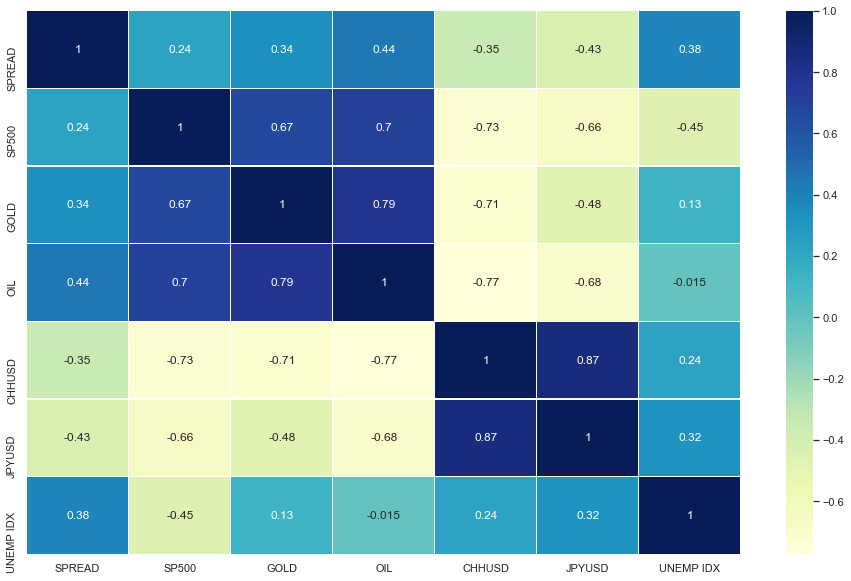

In [11]:
f, ax = plt.subplots(figsize =(16, 10)) 
sns.heatmap(Correlation_Map, ax = ax, cmap ="YlGnBu", linewidths = 0.1, annot= True) 

### Pairwise Correlation

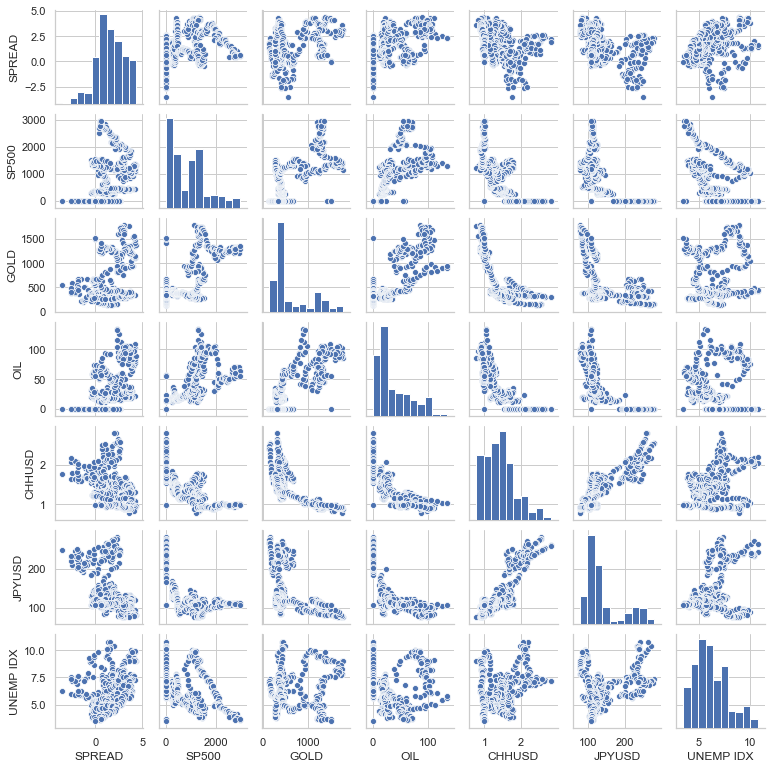

In [12]:
sns.pairplot(df,height=1.5,palette="husl")
plt.show()

## Scaling the FeatureSet

In [13]:
Y=df['SPREAD']

In [14]:
Y=pd.Series(np.where(Y.values < 0, 1, 0),Y.index)

In [15]:
X=df.drop(['SPREAD'],axis=1)

In [16]:
MMScalerX = MinMaxScaler()

In [17]:
X = MMScalerX.fit_transform(X)


In [18]:
X = pd.DataFrame(X,columns=['SP500',
                            'GOLD',
                            'OIL',
                            'CHHUSD',
                            'JPYUSD',
                            'UNEMP IDX'])

In [19]:
bestfeatures = SelectKBest(score_func=chi2,k = 6)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
print(featureScores.nlargest(6,'Score'))

       Specs     Score
4     JPYUSD  8.482283
0      SP500  5.422256
2        OIL  5.006536
1       GOLD  3.117548
3     CHHUSD  2.820943
5  UNEMP IDX  0.609183


### Classifying the Spead such that inverted values are substituted as 1 and others as 0

In [20]:
#Y=pd.Series(np.where(Y.values < 0, 1, 0),
#         Y.index)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle =False)
Y.value_counts()

0    438
1     73
dtype: int64

# Applying various models below

## Predicting using SVM

In [21]:
reg = svm.SVC(kernel='linear')
reg.fit(X_train, Y_train)
Y_pred=reg.predict(X_test)
SVM_A = reg.score(X_test, Y_test)
print('Accuracy')
print(reg.score(X_test, Y_test))
print(reg.coef_)
print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))

Accuracy
0.9805825242718447
[[ 0.1126065   0.88015421 -0.53444526 -0.46207591  0.61940344 -0.46902993]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       101
           1       0.00      0.00      0.00         2

    accuracy                           0.98       103
   macro avg       0.49      0.50      0.50       103
weighted avg       0.96      0.98      0.97       103

[[101   0]
 [  2   0]]


## Predicting Using Decision Tree

Accuracy
0.8446601941747572
              precision    recall  f1-score   support

           0       0.99      0.85      0.91       101
           1       0.06      0.50      0.11         2

    accuracy                           0.84       103
   macro avg       0.53      0.68      0.51       103
weighted avg       0.97      0.84      0.90       103

[[86 15]
 [ 1  1]]
[0.13317344 0.11874285 0.14526496 0.32021897 0.13300123 0.14959855]


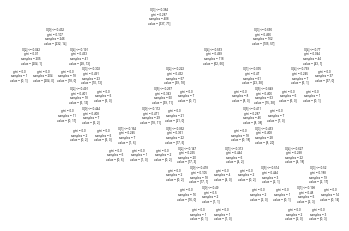

In [22]:
reg = DecisionTreeClassifier()
reg.fit(X_train, Y_train)
tree.plot_tree(reg)
Y_pred=reg.predict(X_test)
DT_A = reg.score(X_test, Y_test)
print('Accuracy')
print(reg.score(X_test, Y_test))
print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))
print(reg.feature_importances_)

## Predicting Using ADaBoost

In [23]:
reg = AdaBoostClassifier()
reg.fit(X_train, Y_train)
Y_pred=reg.predict(X_test)
ADB_A = reg.score(X_test, Y_test)
print('Accuracy')
print(reg.score(X_test, Y_test))
print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))
print(reg.feature_importances_)

Accuracy
0.9805825242718447
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       101
           1       0.00      0.00      0.00         2

    accuracy                           0.98       103
   macro avg       0.49      0.50      0.50       103
weighted avg       0.96      0.98      0.97       103

[[101   0]
 [  2   0]]
[0.08 0.16 0.14 0.26 0.14 0.22]


## Predicting Using RandomForest

In [24]:
reg = RandomForestClassifier()
reg.fit(X_train, Y_train)
Y_pred=reg.predict(X_test)
RF_A = reg.score(X_test, Y_test)
print('Accuracy')
print(reg.score(X_test, Y_test))
print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))
print(reg.feature_importances_)

Accuracy
0.9029126213592233
              precision    recall  f1-score   support

           0       0.99      0.91      0.95       101
           1       0.10      0.50      0.17         2

    accuracy                           0.90       103
   macro avg       0.54      0.71      0.56       103
weighted avg       0.97      0.90      0.93       103

[[92  9]
 [ 1  1]]
[0.12649612 0.15490051 0.12610272 0.25964314 0.14849538 0.18436214]


# Predicting Using GaussianNB

In [25]:
reg1 = GaussianNB()
reg1.fit(X_train, Y_train)
Y_pred=reg1.predict(X_test)
GNB_A = reg1.score(X_test, Y_test)
print('Accuracy')
print(reg1.score(X_test, Y_test))
print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))

Accuracy
0.9805825242718447
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       101
           1       0.00      0.00      0.00         2

    accuracy                           0.98       103
   macro avg       0.49      0.50      0.50       103
weighted avg       0.96      0.98      0.97       103

[[101   0]
 [  2   0]]


## Predicting Using BernoulliNB

In [26]:
reg1 = BernoulliNB()
reg1.fit(X_train, Y_train)
Y_pred=reg1.predict(X_test)
BNB_A = reg1.score(X_test, Y_test)
print('Accuracy')
print(reg1.score(X_test, Y_test))
print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))

Accuracy
0.9902912621359223
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       101
           1       1.00      0.50      0.67         2

    accuracy                           0.99       103
   macro avg       1.00      0.75      0.83       103
weighted avg       0.99      0.99      0.99       103

[[101   0]
 [  1   1]]


## Predicting Using KNN

In [27]:
reg1 = KNeighborsClassifier(n_neighbors= 21 , weights = 'uniform', metric='euclidean')
reg1.fit(X_train, Y_train)
Y_pred=reg1.predict(X_test)
KNN_A = reg1.score(X_test, Y_test)
print('Accuracy')
print(reg1.score(X_test, Y_test))
print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))

Accuracy
0.9320388349514563
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       101
           1       0.00      0.00      0.00         2

    accuracy                           0.93       103
   macro avg       0.49      0.48      0.48       103
weighted avg       0.96      0.93      0.95       103

[[96  5]
 [ 2  0]]


# Accuracy plot

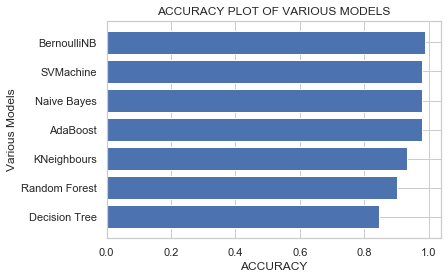



AdaBoost        : 0.9805825242718447
Decision Tree   : 0.8446601941747572
Random Forest   : 0.9029126213592233
SVmachine       : 0.9805825242718447
KNeighbours     : 0.9320388349514563
NaiveBayesGausi : 0.9805825242718447
BernoulliNB     : 0.9902912621359223


In [28]:
x1 = ["AdaBoost","Decision Tree","Random Forest","Naive Bayes","KNeighbours","SVMachine","BernoulliNB"]
y1 = [ADB_A, DT_A, RF_A, GNB_A,KNN_A, SVM_A, BNB_A] 
dict1 = {"AdaBoost":ADB_A,"Decision Tree":DT_A,"Random Forest":RF_A,"Naive Bayes":GNB_A,"KNeighbours":KNN_A,"SVMachine":SVM_A,"BernoulliNB":BNB_A}

dict2= {k: v for k, v in sorted(dict1.items(), key=lambda item: item[1])}

# plotting the line 1 points  
y1.sort(reverse=True)
y_pos = np.arange(len(x1))
plt.barh(y_pos, dict2.values())
plt.yticks(y_pos, dict2.keys())
plt.xlabel('ACCURACY') 
plt.ylabel('Various Models') 
# giving a title to my graph 
plt.title('ACCURACY PLOT OF VARIOUS MODELS') 
plt.show()
print ("\n")
print ("AdaBoost        :", ADB_A)
print ("Decision Tree   :", DT_A)
print ("Random Forest   :", RF_A)
print ("SVmachine       :", SVM_A)
print ("KNeighbours     :", KNN_A)
print ("NaiveBayesGausi :", GNB_A)
print ("BernoulliNB     :", BNB_A)

## Conclusion

As we can see that Random Forest performs poorly. I think the reason why this happened is a lot dependent on the nature of the dataset. The Dataset has fever inversion as opposed to positive values. And the overall data is also a lot less to train on. That’s why decision tree may be pruning these little inversions and in the process the inversions are lost. At the same time, I think due to the small size of the dataset the decision tree is learning less and tries to overfit while predicting.
Bayes on other hand inherently assumes that the features are independent and rightly so. In a small dataset I believe that is a better strategy to win prediction than finding meaningful relationships among various features like the decision tree. That is why we see os much variation in accuracy.